In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

1. Read the dataset and have an overall understanding of the data size, variables, quality and variable correlations.

In [2]:
data = pd.read_csv('assessment_data.csv')

In [3]:
data.shape

(165474, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 22 columns):
Unnamed: 0             165474 non-null int64
device1                165474 non-null object
device1_numsessions    165474 non-null int64
device2                165474 non-null object
session_overlaps       165474 non-null int64
device2_numsessions    165474 non-null int64
device2_count2         165474 non-null int64
device2_count3         165474 non-null int64
device2_loc1           165474 non-null object
device2_count4         165474 non-null int64
device2_count5         165474 non-null int64
device2_date1          165474 non-null object
device2_date2          165474 non-null object
device2_bool1          59091 non-null float64
additional_feature1    165474 non-null int64
additional_feature2    165474 non-null int64
additional_feature3    165474 non-null float64
additional_feature4    165474 non-null float64
additional_feature5    165474 non-null float64
device1_date1         

In [5]:
data.head(10)

,Unnamed: 0,device1,device1_numsessions,device2,session_overlaps,device2_numsessions,device2_count2,device2_count3,device2_loc1,device2_count4,...,device2_date2,device2_bool1,additional_feature1,additional_feature2,additional_feature3,additional_feature4,additional_feature5,device1_date1,device1_loc1,classification
0,12,device1424,10,device277201,3,10,2,10,Store_2456,5,...,2017-04-01 17:53:35.0,1.0,3,2029,1.137013,1.0,0.348135,2016-11-26,Store_2456,0
1,85,device9313,8,device158640,3,11,1,11,Store_2038,11,...,2017-01-24 13:59:02.0,NaN,2,2611,1.008809,1.0,0.093441,2016-11-16,Store_2038,0
2,107,device12934,4,device219316,3,6,2,6,Store_1947,6,...,2017-07-15 13:43:06.0,1.0,2,1903,1.016816,1.0,0.128580,2016-12-30,Store_1947,0
3,108,device12989,8,device283349,2,3,1,3,Store_1900,3,...,2017-03-30 12:16:00.0,NaN,2,1973,1.011151,1.0,0.105006,2016-11-21,Store_1900,0
4,116,device14262,9,device157131,2,3,1,3,Store_2022,3,...,2016-12-04 13:46:36.0,NaN,2,2949,1.005765,1.0,0.075706,2016-11-20,Store_2022,0
5,150,device18867,4,device143900,3,9,1,9,Store_2317,8,...,2016-11-28 15:17:08.0,1.0,2,668,1.017964,1.0,0.132821,2016-11-07,Store_2317,1
6,160,device20216,30,device214057,4,7,1,7,Store_2364,7,...,2017-04-23 17:56:17.0,NaN,4,6992,1.114846,1.0,0.347181,2016-10-30,Store_2364,0
7,161,device20216,30,device214057,4,7,1,7,Store_2364,7,...,2017-04-23 17:56:17.0,NaN,4,6992,1.114846,1.0,0.347181,2016-10-30,Store_2364,0
8,163,device20827,2,device187149,2,2,1,2,Store_0181,2,...,2017-06-05 16:29:10.0,NaN,1,278,1.000000,1.0,0.000000,2017-06-03,Store_0181,0
9,164,device20957,3,device240075,3,7,1,7,Store_1919,7,...,2017-06-24 11:42:56.0,NaN,3,888,1.655405,2.0,0.486940,2017-04-01,Store_1919,0


In [6]:
data.apply(lambda x: sum(x.isnull()))

Unnamed: 0                  0
device1                     0
device1_numsessions         0
device2                     0
session_overlaps            0
device2_numsessions         0
device2_count2              0
device2_count3              0
device2_loc1                0
device2_count4              0
device2_count5              0
device2_date1               0
device2_date2               0
device2_bool1          106383
additional_feature1         0
additional_feature2         0
additional_feature3         0
additional_feature4         0
additional_feature5         0
device1_date1               0
device1_loc1                0
classification              0
dtype: int64

Device2_bool1 has a lot of missing value. In this case, the missing value should be imputate by replacing the missing value as 0.

In [7]:
data['device2_bool1'].fillna(0, inplace = True)

In [8]:
data[['device2_bool1']].head(5)

,device2_bool1
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


To have a better understanding of the data, look at the variable and its summary.

In [9]:
data.describe()

,Unnamed: 0,device1_numsessions,session_overlaps,device2_numsessions,device2_count2,device2_count3,device2_count4,device2_count5,device2_bool1,additional_feature1,additional_feature2,additional_feature3,additional_feature4,additional_feature5,classification
count,1.654740e+05,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,1.234794e+06,9.784788,3.755732,27.603503,2.056426,27.603503,7.646549,7.646549,0.357101,2.679557,1986.045572,1.109723,1.050153,0.204283,0.377497
std,7.144282e+05,13.377127,2.741353,144.625693,2.470379,144.625693,6.427743,6.427743,0.479147,1.756591,2490.876235,0.286019,0.287068,0.293264,0.484762
min,1.200000e+01,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
25%,6.170588e+05,3.000000,2.000000,4.000000,1.000000,4.000000,3.000000,3.000000,0.000000,2.000000,645.000000,1.003839,1.000000,0.061313,0.000000
50%,1.233596e+06,6.000000,3.000000,7.000000,1.000000,7.000000,6.000000,6.000000,0.000000,2.000000,1253.000000,1.013029,1.000000,0.113853,0.000000
75%,1.854905e+06,11.000000,4.000000,12.000000,2.000000,12.000000,10.000000,10.000000,1.000000,3.000000,2389.000000,1.104237,1.000000,0.307306,1.000000
max,2.476347e+06,388.000000,72.000000,3327.000000,78.000000,3327.000000,128.000000,128.000000,1.000000,58.000000,65487.000000,23.278768,24.000000,18.714006,1.000000


The summary of each variable indicates that additional_feature2 has a very large std and wide range. The gradient convergence speed will decrease a lot, even cannot converge. So apply scaling for this variable first into the range of [0, 30]. To make sure all the five additional_feature have the similar range, do the same process for additional_feature1

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 30))
feature1_scale = scaler.fit(data['additional_feature1'])
data['scaled_feature1'] = scaler.fit_transform(data['additional_feature1'], feature1_scale)
feature2_scale = scaler.fit(data['additional_feature2'])
data['scaled_feature2'] = scaler.fit_transform(data['additional_feature2'], feature2_scale)
data.head(10)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning

,Unnamed: 0,device1,device1_numsessions,device2,session_overlaps,device2_numsessions,device2_count2,device2_count3,device2_loc1,device2_count4,...,additional_feature1,additional_feature2,additional_feature3,additional_feature4,additional_feature5,device1_date1,device1_loc1,classification,scaled_feature1,scaled_feature2
0,12,device1424,10,device277201,3,10,2,10,Store_2456,5,...,3,2029,1.137013,1.0,0.348135,2016-11-26,Store_2456,0,1.052632,0.928166
1,85,device9313,8,device158640,3,11,1,11,Store_2038,11,...,2,2611,1.008809,1.0,0.093441,2016-11-16,Store_2038,0,0.526316,1.194796
2,107,device12934,4,device219316,3,6,2,6,Store_1947,6,...,2,1903,1.016816,1.0,0.128580,2016-12-30,Store_1947,0,0.526316,0.870442
3,108,device12989,8,device283349,2,3,1,3,Store_1900,3,...,2,1973,1.011151,1.0,0.105006,2016-11-21,Store_1900,0,0.526316,0.902511
4,116,device14262,9,device157131,2,3,1,3,Store_2022,3,...,2,2949,1.005765,1.0,0.075706,2016-11-20,Store_2022,0,0.526316,1.349643
5,150,device18867,4,device143900,3,9,1,9,Store_2317,8,...,2,668,1.017964,1.0,0.132821,2016-11-07,Store_2317,1,0.526316,0.304655
6,160,device20216,30,device214057,4,7,1,7,Store_2364,7,...,4,6992,1.114846,1.0,0.347181,2016-10-30,Store_2364,0,1.578947,3.201851
7,161,device20216,30,device214057,4,7,1,7,Store_2364,7,...,4,6992,1.114846,1.0,0.347181,2016-10-30,Store_2364,0,1.578947,3.201851
8,163,device20827,2,device187149,2,2,1,2,Store_0181,2,...,1,278,1.000000,1.0,0.000000,2017-06-03,Store_0181,0,0.000000,0.125985
9,164,device20957,3,device240075,3,7,1,7,Store_1919,7,...,3,888,1.655405,2.0,0.486940,2017-04-01,Store_1919,0,1.052632,0.405443


In [11]:
data.describe()

,Unnamed: 0,device1_numsessions,session_overlaps,device2_numsessions,device2_count2,device2_count3,device2_count4,device2_count5,device2_bool1,additional_feature1,additional_feature2,additional_feature3,additional_feature4,additional_feature5,classification,scaled_feature1,scaled_feature2
count,1.654740e+05,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,1.234794e+06,9.784788,3.755732,27.603503,2.056426,27.603503,7.646549,7.646549,0.357101,2.679557,1986.045572,1.109723,1.050153,0.204283,0.377497,0.883977,0.908487
std,7.144282e+05,13.377127,2.741353,144.625693,2.470379,144.625693,6.427743,6.427743,0.479147,1.756591,2490.876235,0.286019,0.287068,0.293264,0.484762,0.924522,1.141138
min,1.200000e+01,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.170588e+05,3.000000,2.000000,4.000000,1.000000,4.000000,3.000000,3.000000,0.000000,2.000000,645.000000,1.003839,1.000000,0.061313,0.000000,0.526316,0.294118
50%,1.233596e+06,6.000000,3.000000,7.000000,1.000000,7.000000,6.000000,6.000000,0.000000,2.000000,1253.000000,1.013029,1.000000,0.113853,0.000000,0.526316,0.572659
75%,1.854905e+06,11.000000,4.000000,12.000000,2.000000,12.000000,10.000000,10.000000,1.000000,3.000000,2389.000000,1.104237,1.000000,0.307306,1.000000,1.052632,1.093091
max,2.476347e+06,388.000000,72.000000,3327.000000,78.000000,3327.000000,128.000000,128.000000,1.000000,58.000000,65487.000000,23.278768,24.000000,18.714006,1.000000,30.000000,30.000000


Have a look at the relationship among device1_numsessions, device2_numsessions and session_overlaps. Since the range of the three variables are very different, here the range for x-axes is [0, 80] based on the range of session_overlaps.

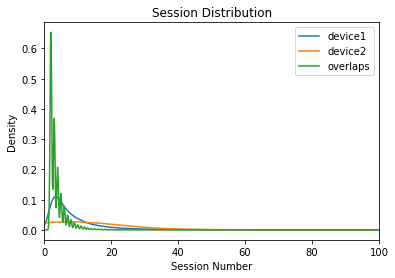

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha = 0.3)
data.device1_numsessions.plot(kind = 'kde')
data.device2_numsessions.plot(kind = 'kde')
data.session_overlaps.plot(kind = 'kde')
plt.xlim(0, 100)
plt.title('Session Distribution')
plt.xlabel('Session Number')
plt.ylabel('Density')
plt.legend(('device1', 'device2', 'overlaps'))

plt.show()

The density of session overlap shows as zigzag shape, which indicates there's little relationship among these three variables. 
Because different device will have very different number of session, these three variables will not be used in the model. Other variables that are irrelevent for the prediction include: device id, device location (because device1 and device2 location is the same). These variables will be dropped from the original dataset.

In [13]:
data.drop('device1', axis = 1, inplace = True)
data.drop('device2', axis = 1, inplace = True)
data.drop('device1_numsessions', axis = 1, inplace = True)
data.drop('device2_numsessions', axis = 1, inplace = True)
data.drop('session_overlaps', axis = 1, inplace = True)
data.drop('device1_loc1', axis = 1, inplace = True)
data.drop('device2_loc1', axis = 1, inplace = True)
data.drop('device1_date1', axis = 1, inplace = True)
data.drop('device2_date1', axis = 1, inplace = True)
data.drop('device2_date2', axis = 1, inplace = True)
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head(10)

,device2_count2,device2_count3,device2_count4,device2_count5,device2_bool1,additional_feature1,additional_feature2,additional_feature3,additional_feature4,additional_feature5,classification,scaled_feature1,scaled_feature2
0,2,10,5,5,1.0,3,2029,1.137013,1.0,0.348135,0,1.052632,0.928166
1,1,11,11,11,0.0,2,2611,1.008809,1.0,0.093441,0,0.526316,1.194796
2,2,6,6,6,1.0,2,1903,1.016816,1.0,0.128580,0,0.526316,0.870442
3,1,3,3,3,0.0,2,1973,1.011151,1.0,0.105006,0,0.526316,0.902511
4,1,3,3,3,0.0,2,2949,1.005765,1.0,0.075706,0,0.526316,1.349643
5,1,9,8,8,1.0,2,668,1.017964,1.0,0.132821,1,0.526316,0.304655
6,1,7,7,7,0.0,4,6992,1.114846,1.0,0.347181,0,1.578947,3.201851
7,1,7,7,7,0.0,4,6992,1.114846,1.0,0.347181,0,1.578947,3.201851
8,1,2,2,2,0.0,1,278,1.000000,1.0,0.000000,0,0.000000,0.125985
9,1,7,7,7,0.0,3,888,1.655405,2.0,0.486940,0,1.052632,0.405443


Now split the data into training and testing set. Set 0.75 for training set, and 0.25 for testing set.

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.25)

Now all the variables are numeric variable type. There're two class to predict - 0 and 1. Logistic regression and random forest are selected for modeling and comparison.
Logistic regression is a very efficient algorithm for binary classification problem. However, we cannot determin whether the variables are linear or non-linear, so in case of non-linear relationships among features, random forest is also applied here. The mean of variable classification is around 0.4, so AUC is selected as the measurement of classification accuracy.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124105 entries, 74019 to 5711
Data columns (total 13 columns):
device2_count2         124105 non-null int64
device2_count3         124105 non-null int64
device2_count4         124105 non-null int64
device2_count5         124105 non-null int64
device2_bool1          124105 non-null float64
additional_feature1    124105 non-null int64
additional_feature2    124105 non-null int64
additional_feature3    124105 non-null float64
additional_feature4    124105 non-null float64
additional_feature5    124105 non-null float64
classification         124105 non-null int64
scaled_feature1        124105 non-null float64
scaled_feature2        124105 non-null float64
dtypes: float64(6), int64(7)
memory usage: 13.3 MB


In [16]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# select the remaining variables and scaled features as predictors
features = ['device2_count2', 'device2_count3', 'device2_count4', 'device2_count5', 'device2_bool1',
           'scaled_feature1', 'scaled_feature2', 'additional_feature3', 'additional_feature4', 'additional_feature5']

# split the training set into training and validation set
training, validation = train_test_split(train, train_size = 0.6)

In [17]:
# build a logistic regression classifier, calculate accuracy and auc
model1 = LogisticRegression(C = 1.0, penalty = 'l1', tol = 1e-6)
model1.fit(training[features], training['classification'])

# predict training set
lr_prediction = model1.predict(validation[features])
lr_predicted = model1.predict_proba(validation[features])[:, 1]

# print model report:
print('The Accuracy of Logistic Regression is %f ' %(metrics.accuracy_score(validation['classification'].values, lr_prediction)))
print('The AUC of Logistic Regression is %f' %(metrics.roc_auc_score(validation['classification'], lr_predicted)))

The Accuracy of Logistic Regression is 0.750272 
The AUC of Logistic Regression is 0.799268


In [18]:
# build a random forest classifier, calculate accuracy and auc
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 5, min_samples_split = 2)
model2.fit(training[features], training['classification'])

# predict training set
rf_prediction = model2.predict(validation[features])
rf_predicted = model2.predict_proba(validation[features])[:, 1]

# print model report:
print('The Accuracy of Random Forest is %f ' %(metrics.accuracy_score(validation['classification'].values, rf_prediction)))
print('The AUC of Random Forest is %f' %(metrics.roc_auc_score(validation['classification'], rf_predicted)))

The Accuracy of Random Forest is 0.757725 
The AUC of Random Forest is 0.817052


In [19]:
# apply the two models on the testing set
# Logistic Regression
lr_prediction = model1.predict(test[features])
lr_predicted = model1.predict_proba(test[features])[:, 1]
print('The Accuracy of Logistic Regression is %f ' %(metrics.accuracy_score(test['classification'].values, lr_prediction)))
print('The AUC of Logistic Regression is %f' %(metrics.roc_auc_score(test['classification'], lr_predicted)))

The Accuracy of Logistic Regression is 0.747323 
The AUC of Logistic Regression is 0.796102


In [20]:
# Random Forest
rf_prediction = model2.predict(test[features])
rf_predicted = model2.predict_proba(test[features])[:, 1]
print('The Accuracy of Random Forest is %f ' %(metrics.accuracy_score(test['classification'].values, rf_prediction)))
print('The AUC of Random Forest is %f' %(metrics.roc_auc_score(test['classification'], rf_predicted)))

The Accuracy of Random Forest is 0.752351 
The AUC of Random Forest is 0.811860


The accuracy is improved from 0.47 to 0.75, and the AUC score is also largely improved. To increase the performance of the model, a new model is trained using XGBOOST.

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# build a function for CV value selection
def modelfit(alg, dtrain, dtest, predictors, useTrainCV=True, cv_folds = 5, early_stopping_rounds = 50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label = dtrain['classification'].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = alg.get_params()['n_estimators'], nfold = cv_folds,
                         early_stopping_rounds = early_stopping_rounds)#, show_progress = False)
        alg.set_params(n_estimators = cvresult.shape[0])

    
    # fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['classification'], eval_metric = 'auc')
    
    # predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]
            
    # print model report:
    print('\nModel Report')
    print('Accuracy: %.4g' % metrics.accuracy_score(dtrain['classification'].values, dtrain_predictions))
    print('AUC Score (Train): %f' %metrics.roc_auc_score(dtrain['classification'], dtrain_predprob))

Apply optimization for the parameters in xgboost model using grid search method.
Calculate the initial classifier and optimize the parameters then.

In [22]:
xgb1 = XGBClassifier(learning_rate = 0.3, n_estimators = 140, max_depth = 5, min_child_weight = 1,
                    gamma = 0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic',
                    nthread = 4, scale_pos_weight = 1, seed = 30)
modelfit(xgb1, train, test, features)


Model Report
Accuracy: 0.7802
AUC Score (Train): 0.854557


In [23]:
# 1. Find the best estimators number for high learning rate
from sklearn.grid_search import GridSearchCV

param1 = {
    'max_depth':[2,3,4,5,6],
    'min_child_weight':[1,2,3,4,5]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=30), 
                       param_grid = param1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[features], train['classification'])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.83950, std: 0.00190, params: {'max_depth': 2, 'min_child_weight': 1},
  mean: 0.83923, std: 0.00224, params: {'max_depth': 2, 'min_child_weight': 2},
  mean: 0.83928, std: 0.00228, params: {'max_depth': 2, 'min_child_weight': 3},
  mean: 0.83923, std: 0.00217, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.83936, std: 0.00213, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.84246, std: 0.00184, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.84248, std: 0.00189, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.84258, std: 0.00210, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.84252, std: 0.00212, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.84268, std: 0.00205, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84266, std: 0.00200, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.84308, std: 0.00190, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.84311, std: 0.00218, params: {

In [24]:
param2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=30), 
                       param_grid = param2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[features], train['classification'])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.84242, std: 0.00221, params: {'gamma': 0.0},
  mean: 0.84244, std: 0.00231, params: {'gamma': 0.1},
  mean: 0.84228, std: 0.00251, params: {'gamma': 0.2},
  mean: 0.84248, std: 0.00216, params: {'gamma': 0.3},
  mean: 0.84214, std: 0.00241, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.8424787466997621)

In [25]:
param3 = {
    'subsample':[i/10.0 for i in range(5,10)],
    'colsample_bytree': [i/10.0 for i in range(5,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.3, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=30), 
                       param_grid = param3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[features], train['classification'])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.84046, std: 0.00195, params: {'colsample_bytree': 0.5, 'subsample': 0.5},
  mean: 0.84104, std: 0.00198, params: {'colsample_bytree': 0.5, 'subsample': 0.6},
  mean: 0.84205, std: 0.00233, params: {'colsample_bytree': 0.5, 'subsample': 0.7},
  mean: 0.84227, std: 0.00208, params: {'colsample_bytree': 0.5, 'subsample': 0.8},
  mean: 0.84281, std: 0.00175, params: {'colsample_bytree': 0.5, 'subsample': 0.9},
  mean: 0.84077, std: 0.00222, params: {'colsample_bytree': 0.6, 'subsample': 0.5},
  mean: 0.84182, std: 0.00230, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.84193, std: 0.00196, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.84230, std: 0.00202, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.84282, std: 0.00208, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.84079, std: 0.00189, params: {'colsample_bytree': 0.7, 'subsample': 0.5},
  mean: 0.84138, std: 0.00238, params: {'colsample_bytree': 0.7, 'subsample'

In [26]:
# use the parameters with best auc score above into the model
xgb2 = XGBClassifier(learning_rate = 0.3, n_estimators = 140, max_depth = 4, min_child_weight = 3,
                    gamma = 0.3, subsample = 0.9, colsample_bytree = 0.6, objective = 'binary:logistic',
                    nthread = 4, scale_pos_weight = 1, seed = 30)
modelfit(xgb2, train, test, features)


Model Report
Accuracy: 0.7788
AUC Score (Train): 0.853740


Conclusion
Compare the accuracy and auc score of the three model: Logistic Regression (accuracy: 0.747, auc: 0.796), Reandom Forest (accuracy: 0.752, auc: 0.812) and XGBOOST (accuracy: 0.780, auc: 0.855), the prediction accuracy has been greatly improved with the more advanced model. Compared with accuracy, AUC score is much sensitive to the model improvement. The optimization of XGBOOST algorithm used grid search, but the auc score was not improved. If there's enough time, different ranges could be tried on more parameters for further optimization to improve the performance.

Problem answer:
1. The project started from feature selection and feature engineering. The quality and overall summary of each variable were checked, and useless variables were dropped. For useful variable which contained unknown features, missing value and rescaling were applied to make the data more normalized. Then three machine learning algorithms were selected for comparison: Logistic Regression, Random Forest and XGBoost. AUC score was selected as the metric for comparison. The dataset was split into training set and testing set. The model with best score was selected - XGBoost with auc score of 0.851955.

2. For this use case, the customer care about the users that are truely related, thus true positive is important for the evaluation. ROC curves show the trade off between false positive and true positive rate, while accuracy just focus on the ratio between positive and negative. For binary classification problem, AUC is a much better choice than accuracy for evaluation and classifier comparison.